# Dataset: Trackster neighborhood approach

Get tracksters from the cone neighbourhood.

Neighbourhood:
- get links from ticlNtuplizer/graph
    - linked_inners: nodes linked to the given tracksters within its cone

Use the features from MLP approach per trackster.
Look at the graph of tracksters, extract information from the neighborhood and perform link prediction.
- convert the tracksters into some latent space and predict a link between them
- use edgeconv or sageconf to add information from the neighbourhood


In [1]:
import uproot
import numpy as np
import awkward as ak

from reco.datasetPU import TracksterGraph, get_event_graph
from reco.data import get_bary_data, get_event_data

# plotting config
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size': 12})
rc('mathtext',**{'default':'regular'})
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pileup = True

ds_name = "CloseByPion200PU"
file_name = f"new_ntuples_15643817_2.root"

data_root = "data"
raw_dir = f"/Users/ecuba/data/{ds_name}"
file_path = f"{raw_dir}/{file_name}"

In [2]:
cluster_data, trackster_data, simtrackster_data, assoc_data = get_event_data(file_path, pileup=pileup)

In [3]:
eid = 0
dataset = get_event_graph(
    cluster_data,
    trackster_data,
    assoc_data,
    eid,
    bigT_e_th=10,
    radius=10,
    pileup=pileup,
)
print("High-energy tracksters:", len(dataset))

ds = dataset[0]

node_index = ds.node_index
pos_index = ds.y >= 0.7
neg_index = ds.y < 0.7

positive = node_index[pos_index].tolist()
negative = node_index[neg_index].tolist()

print("Trackster 0:", len(positive), "/", len(node_index))

High-energy tracksters: 3
Trackster 0: 8 / 47


## Evaluation

In [4]:
from reco.evaluation import model_evaluation
from reco.dummy import DummyPleaser

In [5]:
result = model_evaluation(
    cluster_data,
    trackster_data,
    simtrackster_data,
    assoc_data,
    DummyPleaser(),
    decision_th=0.5,
    bigT_e_th=5,
    radius=15,
    max_events=10,
    reco_eval=False,
    graph=True,
    pileup=pileup,
)

Event 0:
	clue3d_to_sim:	P: 0.802 R: 0.307 F: 0.607
	target_to_sim:	P: 0.718 R: 0.727 F: 0.720
Event 1:
	clue3d_to_sim:	P: 0.993 R: 0.335 F: 0.713
	target_to_sim:	P: 0.984 R: 0.427 F: 0.780
Event 2:
	clue3d_to_sim:	P: 0.955 R: 0.221 F: 0.573
	target_to_sim:	P: 0.925 R: 0.430 F: 0.752
Event 3:
	clue3d_to_sim:	P: 0.976 R: 0.793 F: 0.933
	target_to_sim:	P: 0.960 R: 0.823 F: 0.929
Event 4:
	clue3d_to_sim:	P: 0.727 R: 0.595 F: 0.696
	target_to_sim:	P: 0.687 R: 0.691 F: 0.687
Event 5:
	clue3d_to_sim:	P: 1.000 R: 0.511 F: 0.839
	target_to_sim:	P: 1.000 R: 0.566 F: 0.867
Event 6:
	clue3d_to_sim:	P: 0.971 R: 0.500 F: 0.817
	target_to_sim:	P: 0.926 R: 0.691 F: 0.867
Event 7:
	clue3d_to_sim:	P: 0.968 R: 0.353 F: 0.718
	target_to_sim:	P: 0.961 R: 0.598 F: 0.857
Event 8:
	clue3d_to_sim:	P: 0.881 R: 0.306 F: 0.640
	target_to_sim:	P: 0.816 R: 0.442 F: 0.698
Event 9:
	clue3d_to_sim:	P: 0.994 R: 0.095 F: 0.343
	target_to_sim:	P: 0.996 R: 0.371 F: 0.745
-----
mean clue3d_to_sim:	P: 0.927 R: 0.402 F: 0.6

In [6]:
eth_ranges = [0, 5, 10, 20, 40, 60]
r_ranges = [10, 15, 20]
eth_results = []

max_events = 20

for r in r_ranges:
    _clue3D_F = []
    _target_F = []
    for eth in eth_ranges:
        print(f" --- Radius: {r} | Eth: {eth} ---")
        result = model_evaluation(
            cluster_data,
            trackster_data,
            simtrackster_data,
            assoc_data,
            DummyPleaser(),
            decision_th=0.5,
            radius=r,
            bigT_e_th=eth,
            max_events=max_events,
            reco_eval=False,
            graph=True,
            pileup=True,
        )
        # ignore cases where there is nothing to do
        c3d = np.array(result["clue3d_to_sim"])[:,2]
        tgf = np.array(result["target_to_sim"])[:,2]
        # cmp_idx = c3d != tgf
        # c3d = c3d[cmp_idx] 
        # tgf = tgf[cmp_idx] 
        _clue3D_F.append(np.sum(c3d) / max_events)
        _target_F.append(np.sum(tgf) / max_events)
    eth_results.append(np.array(_target_F) - np.array(_clue3D_F))

 --- Radius: 10 | Eth: 0 ---
Event 0:
	clue3d_to_sim:	P: 0.805 R: 0.309 F: 0.609
	target_to_sim:	P: 0.757 R: 0.706 F: 0.746
Event 1:
	clue3d_to_sim:	P: 0.987 R: 0.335 F: 0.711
	target_to_sim:	P: 0.984 R: 0.429 F: 0.782
Event 2:
	clue3d_to_sim:	P: 0.947 R: 0.222 F: 0.573
	target_to_sim:	P: 0.922 R: 0.769 F: 0.886
Event 3:
	clue3d_to_sim:	P: 0.963 R: 0.794 F: 0.924
	target_to_sim:	P: 0.961 R: 0.909 F: 0.950
Event 4:
	clue3d_to_sim:	P: 0.727 R: 0.595 F: 0.696
	target_to_sim:	P: 0.700 R: 0.651 F: 0.690
Event 5:
	clue3d_to_sim:	P: 1.000 R: 0.513 F: 0.840
	target_to_sim:	P: 1.000 R: 0.539 F: 0.854
Event 6:
	clue3d_to_sim:	P: 0.961 R: 0.500 F: 0.811
	target_to_sim:	P: 0.926 R: 0.690 F: 0.867
Event 7:
	clue3d_to_sim:	P: 0.965 R: 0.354 F: 0.718
	target_to_sim:	P: 0.961 R: 0.598 F: 0.857
Event 8:
	clue3d_to_sim:	P: 0.868 R: 0.308 F: 0.637
	target_to_sim:	P: 0.811 R: 0.444 F: 0.696
Event 9:
	clue3d_to_sim:	P: 0.992 R: 0.140 F: 0.447
	target_to_sim:	P: 0.992 R: 0.374 F: 0.746
Event 10:
	clue3d_to_

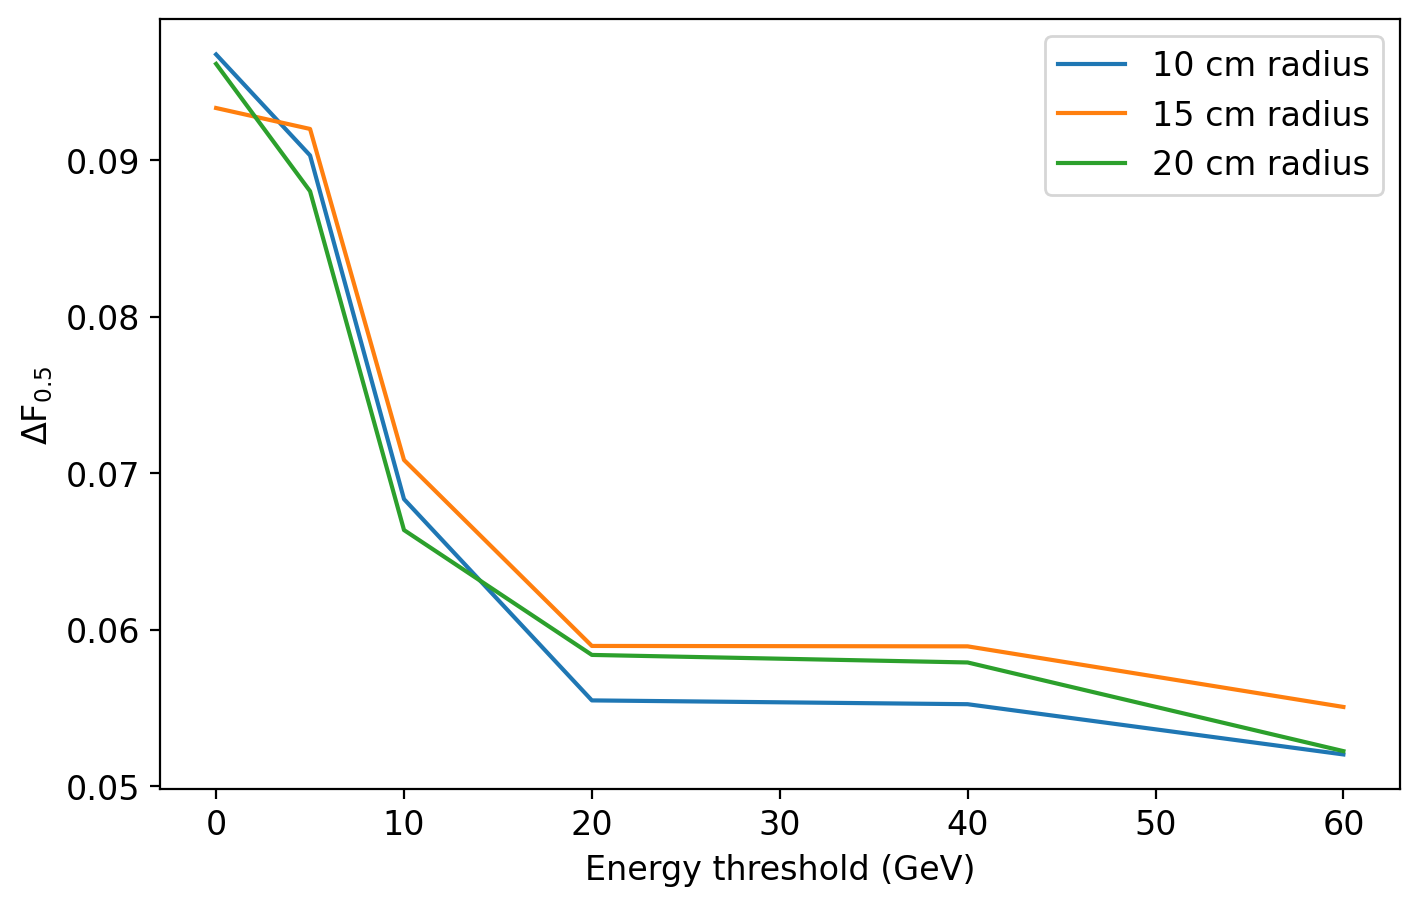

In [7]:
fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(111)

for r, res in zip(r_ranges, eth_results):
    ax.plot(eth_ranges, res, label=f"{r} cm radius")

ax.legend()
# ax.set_xlim(0, 100)
ax.set_xlabel("Energy threshold (GeV)")
ax.set_ylabel("$\Delta F_{0.5}$")

# outcome: 10 cm makes sense for PU, not higher

fig.savefig(f'export/{ds_name}-graph-energy-plot.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()